In [1]:
from quantumblur import *
import quantumblur as qb
import numpy as np

In [2]:
height = 8
width = 32

offsets = []
for j in range(width):
    offsets.append(int(4*(1+np.sin(j*np.pi/12))))
grid, n, = make_strip(offsets,height,rotate=True)

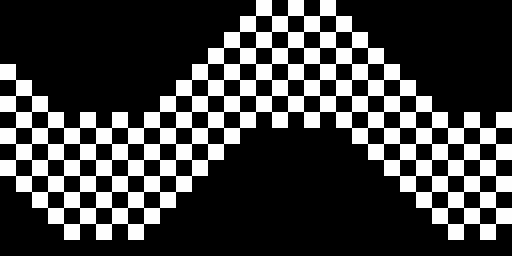

In [3]:
height = {}
for _, pos in grid.items():
    height[pos] = 0
height[grid['0'*n]] = 1
height[grid['1'*n]] = 1

qc = height2circuit(height,grid=grid)
for q in range(n):
    qc.ry(0.5*3.14,q)

height = circuit2height(qc,grid=grid)

img = height2image(height)
img.resize((512,int(512*img.size[1]/img.size[0])),0)

In [ ]:
def apply_blur(height, points, radius, strength, rotate=False):
    """
    Applies Quantum Blur to a heighmap on a region defined by a radius
    and a set of points.

    Args:
        height (dict): A dictionary in which keys are coordinates
            for points on a grid, and the values are positive numbers
            from 0 to 1.
        points (list): a list of coordinates from the height map.
        radius (int): width (or height) of the strips formed between
            successive pairs of points, on which Quantum Blur is
            applied.
        strength (float): strength of the effect between 0 and 1
        rotate (bool): By default, strips have a fixed width. For
            rotate=True, they will instead have a fixed height.

    Returns:
        height (dict): A modifed height map.
    """

    for j in range(len(points)-1):
        
        width = abs(points[j][0] - points[j+1][0])
        height = abs(points[j][1] - points[j+1][1])
        if rotate:
            width, height = height, width


    new_height = height.copy()

    new_height[0] = 1

    return new_height